# 워드클라우드 과제
> 
> - 제출자 : 한혜형
> - 검색어 : 청와대 역사 정보

> ### 청와대 역사
> - 사이트 :https://www.opencheongwadae.kr/introduce-history
> - 청와대 역사 정보가져오기

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [2]:
# 부라우저에서 볼수 있는 코드로 가져옴

url = 'https://www.opencheongwadae.kr/introduce-history'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml") #html parsing 해주는 코드 / parsing 해서  soup객체로 만들기
soup.title # 모든파일에는 title이 존재하므로 이것부터 잘 가져오는지 확인

<title>역사 | 청와대, 국민 품으로</title>

### 1. 데이터수집

In [3]:
data_tag = soup.find('div', 'history_wrap')
data_tag

<div class="history_wrap">
<div class="top_box">
<div class="txt_box">
<p class="s_txt">청와대의 주소는 서울시 종로구 청와대로 1번지입니다. <br/>북악산을 배경으로 자리 잡고 있으며, 시청과 종로·을지로 등 도심 사무실 밀집지역의 북쪽에 있습니다.</p>
<p class="s_txt">청와대의 주소는 일제 강점기인 1911년 12월 20일 ‘광화문 1번지’로 정해졌었는데, <br/>광복 다음 해인 1946년 1월 1일부터 일본식 주소가 한국식으로 바뀌면서 ‘세종로 1번지’가 되었습니다.</p>
</div>
<span class="img"><img alt="" src="/_html/img/sub/history_img01.png"/></span></div>
<div class="history_list"><span class="progressbar"><span class="progress"></span></span>
<ul>
<li><span class="img"><img alt="" src="/_html/img/sub/history_img02.png"/><em class="r_img"><strong>남경 왕궁 배치 추정 복원도</strong></em></span>
<div class="txt_box">
<h5 class="l_tit">고려시대</h5>
<strong class="s_tit">이궁(離宮)이 있던 자리</strong>
<p class="s_txt">청와대 부근이 역사에 처음 등장한 것은 고려 숙종 때인 1104년 무렵 고려의 이궁이 이 곳에 들어서면서 부터입니다. 고려는 풍수지리설에 따라 도읍이었던 개경(지금의 북한 개성)과 함께 서경(평양), 동경(경주)의 세 곳을 삼경으로 두었는데 숙종 때 동경 대신 이곳에 이궁을 설치하고 남경으로 삼았습니다. 남경이란 ‘남쪽의 서울’ 이란 뜻이 담겨져 있습니다.</p>
</div>
</li>
<li>
<div class="img"><img 

In [4]:
hist_text = data_tag.get_text()
hist_text

'\n\n\n청와대의 주소는 서울시 종로구 청와대로 1번지입니다. 북악산을 배경으로 자리 잡고 있으며, 시청과 종로·을지로 등 도심 사무실 밀집지역의 북쪽에 있습니다.\n청와대의 주소는 일제 강점기인 1911년 12월 20일 ‘광화문 1번지’로 정해졌었는데, 광복 다음 해인 1946년 1월 1일부터 일본식 주소가 한국식으로 바뀌면서 ‘세종로 1번지’가 되었습니다.\n\n\n\n\n남경 왕궁 배치 추정 복원도\n\n고려시대\n이궁(離宮)이 있던 자리\n청와대 부근이 역사에 처음 등장한 것은 고려 숙종 때인 1104년 무렵 고려의 이궁이 이 곳에 들어서면서 부터입니다. 고려는 풍수지리설에 따라 도읍이었던 개경(지금의 북한 개성)과 함께 서경(평양), 동경(경주)의 세 곳을 삼경으로 두었는데 숙종 때 동경 대신 이곳에 이궁을 설치하고 남경으로 삼았습니다. 남경이란 ‘남쪽의 서울’ 이란 뜻이 담겨져 있습니다.\n\n\n\n\n\n1. 경복궁도문화재청, 『사진으로 보는 경복궁』 2006년, 75면 전체\n2. 경복궁도 조선 영조 43(1767)년 이후, 서울역사박물관 소장\n3. 경복궁전도 조선 영조 43(1767)년 이후, 서울 삼성출판박물관 소장\n\n\n\n조선시대\n경복궁의 후원터\n청와대 자리가 다시 역사에 등장한 것은 조선의 건국과 함께 도읍을 옮기자는 주장이 시작되면서 부터였습니다.\n조선의 첫 임금인 태조 이성계는1394년 새로운 서울을 세우기 위한 <신도궁궐조성도감(新都宮闕造成都監)>이라는 특별 기구를 만들었습니다. 그리고 관리들을 보내 궁궐터를 찾아보게 했는데 고려 숙종 때의 이궁 자리는 너무 좁아서 새로 궁궐을 짓기가 어려우므로 좀 더 남쪽으로 내려가서 궁궐을 지어야 한다고 의견이 모아졌습니다. 즉, 오늘날의 청와대 터에서 좀 더 내려간 평지에 왕궁을 짓기로 한 것이지요. 태조는 그 해 12월 정도전으로 하여금 궁궐 짓는 일을 시작하도록 했고 이듬해에 본격적으로 시작하여 9월에 궁을 완성하였습니다. 이렇게 만들어진 궁이 바로 경복궁입니다.\n경복궁이

In [5]:
hist_text = hist_text.replace('\t', ' ')
hist_text = hist_text.replace('\n', ' ')
hist_text = hist_text.strip()
hist_text

'청와대의 주소는 서울시 종로구 청와대로 1번지입니다. 북악산을 배경으로 자리 잡고 있으며, 시청과 종로·을지로 등 도심 사무실 밀집지역의 북쪽에 있습니다. 청와대의 주소는 일제 강점기인 1911년 12월 20일 ‘광화문 1번지’로 정해졌었는데, 광복 다음 해인 1946년 1월 1일부터 일본식 주소가 한국식으로 바뀌면서 ‘세종로 1번지’가 되었습니다.     남경 왕궁 배치 추정 복원도  고려시대 이궁(離宮)이 있던 자리 청와대 부근이 역사에 처음 등장한 것은 고려 숙종 때인 1104년 무렵 고려의 이궁이 이 곳에 들어서면서 부터입니다. 고려는 풍수지리설에 따라 도읍이었던 개경(지금의 북한 개성)과 함께 서경(평양), 동경(경주)의 세 곳을 삼경으로 두었는데 숙종 때 동경 대신 이곳에 이궁을 설치하고 남경으로 삼았습니다. 남경이란 ‘남쪽의 서울’ 이란 뜻이 담겨져 있습니다.      1. 경복궁도문화재청, 『사진으로 보는 경복궁』 2006년, 75면 전체 2. 경복궁도 조선 영조 43(1767)년 이후, 서울역사박물관 소장 3. 경복궁전도 조선 영조 43(1767)년 이후, 서울 삼성출판박물관 소장    조선시대 경복궁의 후원터 청와대 자리가 다시 역사에 등장한 것은 조선의 건국과 함께 도읍을 옮기자는 주장이 시작되면서 부터였습니다. 조선의 첫 임금인 태조 이성계는1394년 새로운 서울을 세우기 위한 <신도궁궐조성도감(新都宮闕造成都監)>이라는 특별 기구를 만들었습니다. 그리고 관리들을 보내 궁궐터를 찾아보게 했는데 고려 숙종 때의 이궁 자리는 너무 좁아서 새로 궁궐을 짓기가 어려우므로 좀 더 남쪽으로 내려가서 궁궐을 지어야 한다고 의견이 모아졌습니다. 즉, 오늘날의 청와대 터에서 좀 더 내려간 평지에 왕궁을 짓기로 한 것이지요. 태조는 그 해 12월 정도전으로 하여금 궁궐 짓는 일을 시작하도록 했고 이듬해에 본격적으로 시작하여 9월에 궁을 완성하였습니다. 이렇게 만들어진 궁이 바로 경복궁입니다. 경복궁이 완성된 뒤 세종 8년인 1426년 현재의 청와대 자리에 

### 2. 워드클라우드

In [6]:
from konlpy.tag import Okt

In [7]:
okt = Okt()

In [8]:
hist_nouns = okt.nouns(hist_text)
hist_nouns

['청와대',
 '주소',
 '서울시',
 '종로구',
 '청와대로',
 '번지',
 '북악산',
 '배경',
 '자리',
 '잡고',
 '시청',
 '종로',
 '을지로',
 '등',
 '도심',
 '사무실',
 '밀집',
 '지역',
 '북쪽',
 '청와대',
 '주소',
 '일제',
 '강점',
 '기인',
 '광화문',
 '번지',
 '로',
 '광복',
 '다음',
 '해인',
 '일본',
 '주소',
 '한국',
 '세종로',
 '번지',
 '남경',
 '왕궁',
 '배치',
 '추정',
 '복원',
 '고려시대',
 '궁',
 '이',
 '자리',
 '청와대',
 '부근',
 '역사',
 '처음',
 '등장',
 '것',
 '고려',
 '숙종',
 '때',
 '무렵',
 '고려',
 '궁',
 '이',
 '곳',
 '부터',
 '고려',
 '풍수지리설',
 '도읍',
 '개경',
 '지금',
 '북한',
 '개성',
 '과',
 '서경',
 '평양',
 '동경',
 '경주',
 '의',
 '세',
 '곳',
 '삼경',
 '숙종',
 '때',
 '동경',
 '대신',
 '곳',
 '궁',
 '설치',
 '남경',
 '남경',
 '남쪽',
 '서울',
 '이란',
 '뜻',
 '경복궁',
 '문화',
 '재청',
 '사진',
 '경복궁',
 '면',
 '전체',
 '경복궁',
 '조선',
 '영조',
 '년',
 '이후',
 '서울역',
 '박물관',
 '소장',
 '경복궁',
 '전도',
 '조선',
 '영조',
 '년',
 '이후',
 '서울',
 '삼성',
 '출판',
 '박물관',
 '소장',
 '조선시대',
 '경복궁',
 '후원',
 '터',
 '청와대',
 '자리',
 '다시',
 '역사',
 '등장',
 '것',
 '조선',
 '건국',
 '도읍',
 '주장',
 '시작',
 '부터',
 '조선',
 '첫',
 '임금',
 '태조',
 '이성계',
 '서울',
 '위',
 '신도',
 '궁궐',
 '도감',
 '특별',
 '기구',
 

In [9]:
hist_nouns[:10]

['청와대', '주소', '서울시', '종로구', '청와대로', '번지', '북악산', '배경', '자리', '잡고']

In [10]:
one_words = []
tow_words = []
etc_words = []

for noun in hist_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(55, 197, 70)

In [11]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(27, 130, 36)

In [12]:
for word in one_words:
    print(word, end='\t')

궁	면	곳	이	뒤	기	일	및	세	등	좀	전	즉	것	해	뜻	년	터	첫	위	그	의	때	제	과	로	더	

In [13]:
stop_words = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

27

In [14]:
# stop_words 빼기
hist_nouns = [ word for word in hist_nouns if word not in stop_words ]
len(hist_nouns)

267

In [15]:
hist_nouns[:10]

['청와대', '주소', '서울시', '종로구', '청와대로', '번지', '북악산', '배경', '자리', '잡고']

In [16]:
import nltk

In [17]:
hist_text = nltk.Text(hist_nouns)
type(hist_text), len(hist_text)

(nltk.text.Text, 267)

In [18]:
# 상위 30개 수 
# data = hist_text.vocab().most_common(500)
data = hist_text.vocab()
data

FreqDist({'경복궁': 12, '청와대': 9, '조선': 8, '자리': 7, '후원': 7, '경무대': 6, '궁궐': 5, '일제': 4, '고려': 4, '이후': 4, ...})

### 3. 워드클라우드 한글폰트 설정

In [19]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [20]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

166

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
# relative_scaling : 글자 간 간격
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

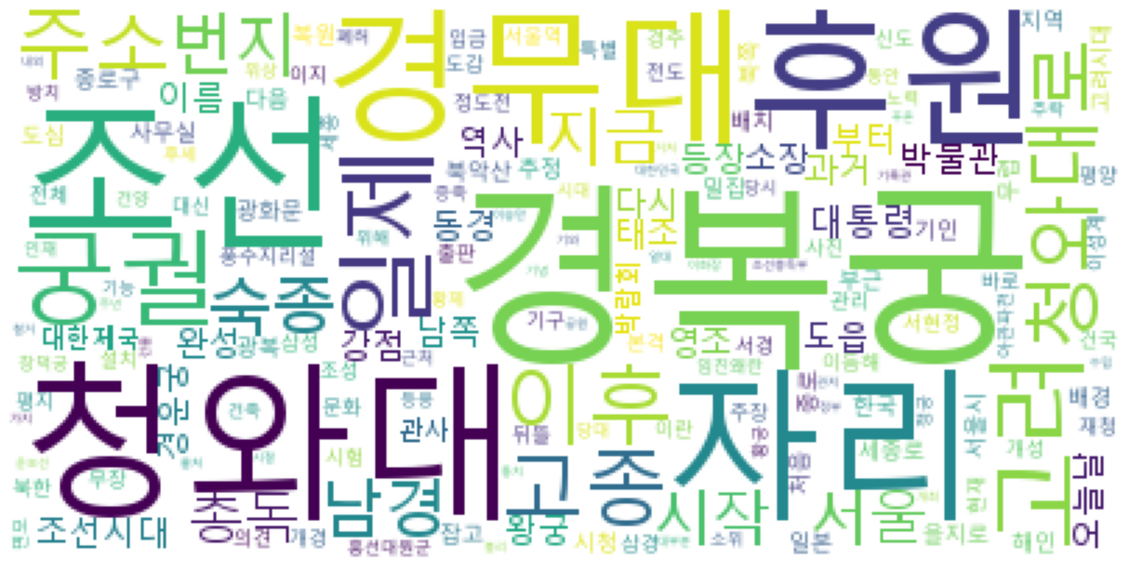

In [23]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

In [24]:
# !mkdir wordcloud

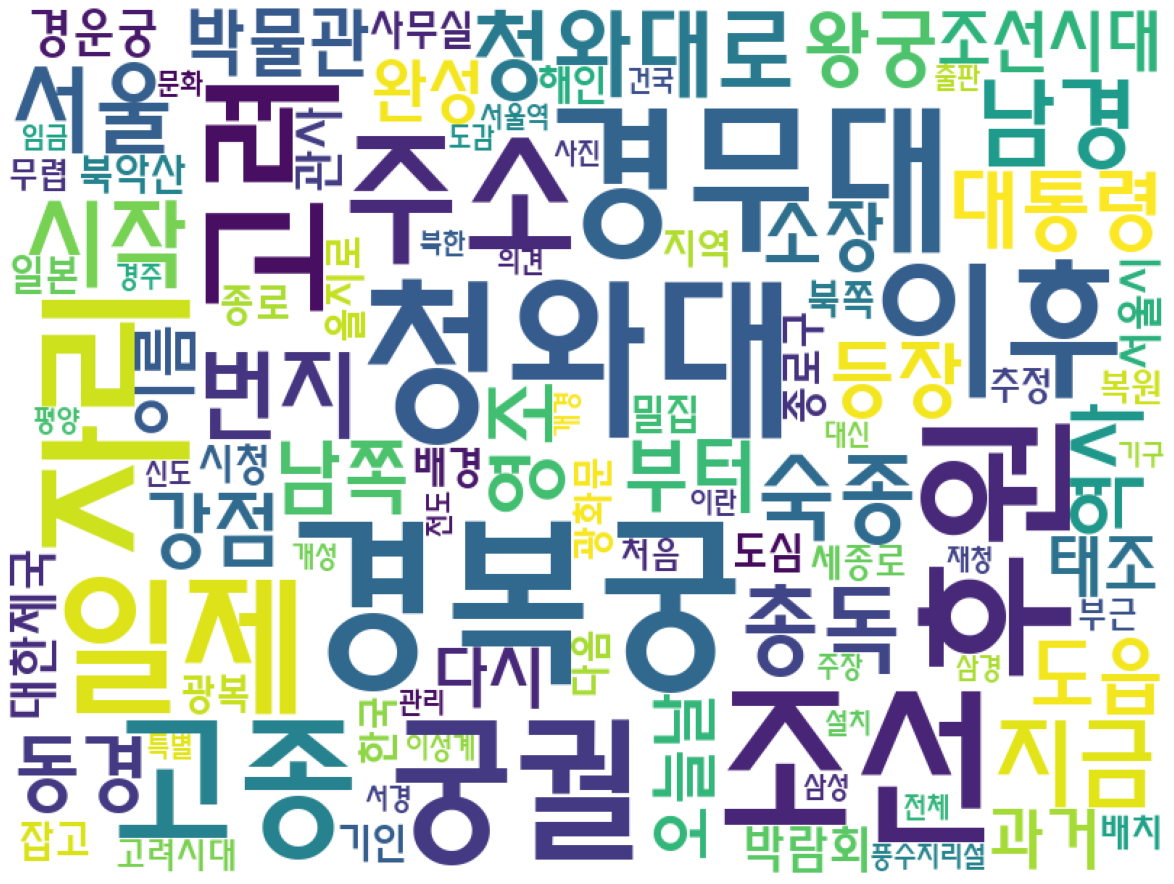

In [25]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/chwd_word1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

### 4. 사진+워드클라우드

In [26]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud

In [27]:
# 이미지파일 numpy로 읽기
# shape_img = np.array(Image.open('images/history_img01.png'))
# shape_img = np.array(Image.open('images/chungwd.png'))
# shape_img = np.array(Image.open('images/chungwd2.png'))
shape_img = np.array(Image.open('images/blue_house.png'))
cloud_img = ImageColorGenerator(shape_img)

(-0.5, 682.5, 282.5, -0.5)

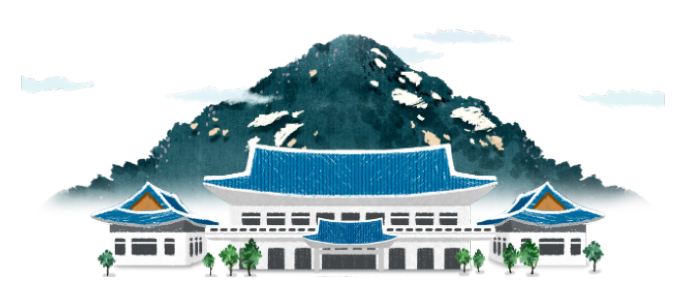

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(shape_img)
plt.axis('off')

In [29]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     mask = shape_img, 
                     background_color = 'white',
                     min_font_size=1, max_font_size=40).generate_from_frequencies(dict_data)

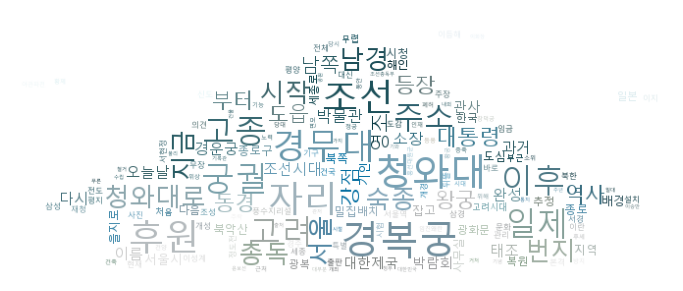

In [30]:
save_img = 'wordcloud/chwd_word2.png'
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=cloud_img))
plt.axis('off')
plt.savefig(save_img)

In [31]:
# 랜덤색으로 나타내기

In [32]:
# 사진 데이터를 pil 패키지의 Image를 활용해서 0~255 데이터로 읽어왔다.
chwd_mask = np.array(Image.open('images/star.png'))

In [33]:
chwd_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

(-0.5, 257.5, 250.5, -0.5)

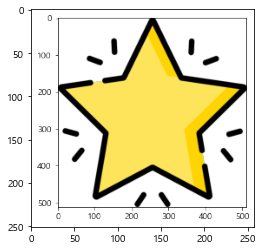

In [34]:
# plt.imshow()는 수치 데이터 -> image데이터로 변환해줌
plt.imshow(chwd_mask, cmap=plt.cm.gray)
plt.axis('on')     # on/off

In [35]:
params = {
    "width"  : 800,
    "height" : 600, 
    "max_words" : 2000,
    "background_color" :"white",
    "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "mask"      : chwd_mask, # 이미지모양으로 workclouding
#     "stopwords" : stopwords
}

# wordcolud_4 = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wordcolud = WordCloud(**params)
wordcolud = wordcolud.generate_from_frequencies(dict_data) 
wordcolud.words_

{'경복궁': 1.0,
 '청와대': 0.75,
 '조선': 0.6666666666666666,
 '자리': 0.5833333333333334,
 '후원': 0.5833333333333334,
 '경무대': 0.5,
 '궁궐': 0.4166666666666667,
 '일제': 0.3333333333333333,
 '고려': 0.3333333333333333,
 '이후': 0.3333333333333333,
 '고종': 0.3333333333333333,
 '주소': 0.25,
 '청와대로': 0.25,
 '번지': 0.25,
 '남경': 0.25,
 '숙종': 0.25,
 '지금': 0.25,
 '서울': 0.25,
 '시작': 0.25,
 '총독': 0.25,
 '대통령': 0.25,
 '강점': 0.16666666666666666,
 '왕궁': 0.16666666666666666,
 '역사': 0.16666666666666666,
 '등장': 0.16666666666666666,
 '부터': 0.16666666666666666,
 '도읍': 0.16666666666666666,
 '동경': 0.16666666666666666,
 '남쪽': 0.16666666666666666,
 '영조': 0.16666666666666666,
 '박물관': 0.16666666666666666,
 '소장': 0.16666666666666666,
 '조선시대': 0.16666666666666666,
 '다시': 0.16666666666666666,
 '태조': 0.16666666666666666,
 '오늘날': 0.16666666666666666,
 '완성': 0.16666666666666666,
 '과거': 0.16666666666666666,
 '이름': 0.16666666666666666,
 '경운궁': 0.16666666666666666,
 '대한제국': 0.16666666666666666,
 '박람회': 0.16666666666666666,
 '관사': 0.166666

In [36]:
shape_img = np.array(Image.open('images/star.png'))
cloud_img = ImageColorGenerator(shape_img)

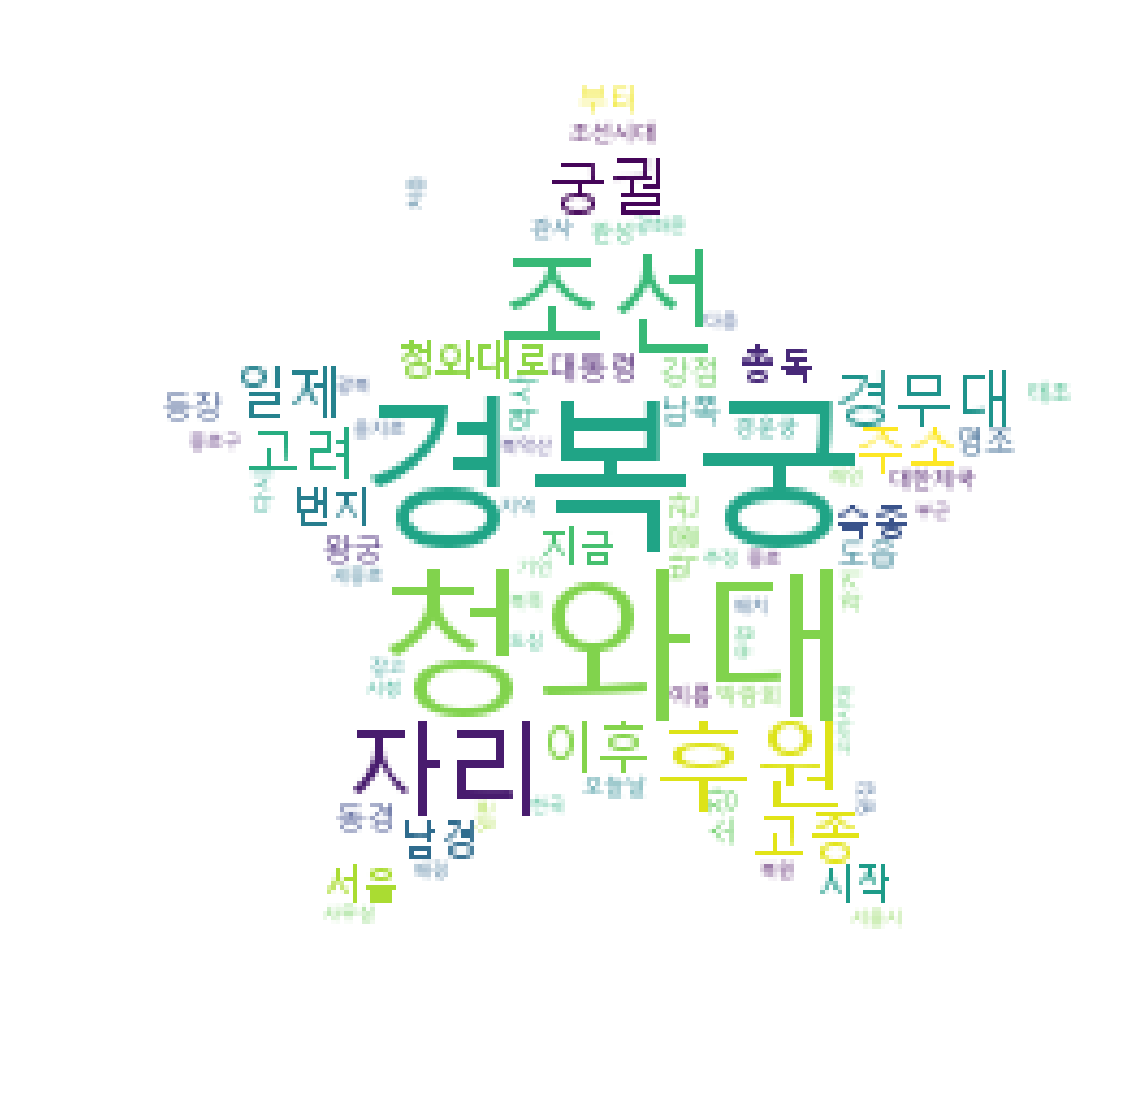

In [37]:
params = {
    "width"            : 300,
    "height"           : 400, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    "background_color" : 'white',
    "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "mask"             :  shape_img, 
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/chwd_word3.png'
plt.figure(figsize=(20,20))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)